In [1]:
#Importing the neccessary libraries
import os
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import matplotlib.pyplot as plt

## Gathering Data

In [2]:
#Programmatically getting the tsv image-prediction data
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
data = requests.get(url)

#writing the data to file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(data.content)

In [3]:
# reading the data with pandas
tae = pd.read_csv('twitter-archive-enhanced.csv')
ip = pd.read_csv('image_predictions.tsv', sep='\t')


In [4]:
# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = "HIDDEN"
# consumer_secret = "HODDEN"
# access_token = "HIDDEN"
# access_secret = "HIDDEN"

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = ratingDogsDF.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.errors.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)



#reading the tweets-json.txt file line by line
tweets_list = []

with open('tweet-json.txt', mode='r') as file:
    for line in file:
        tweets_list.append(json.loads(line))
    

In [5]:
#converting the tweets lists into a pandas dataframe
td = pd.DataFrame(tweets_list , columns = ['id' , 'retweet_count' , 'favorite_count'])

## Assessing the Data

#### Visually Assessing Data


In [6]:
tae.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
ip.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
td.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Programmically Assessing Data
> 1. twitter_archive_enhanced

In [9]:
tae.shape

(2356, 17)

In [10]:
tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
tae.tweet_id.duplicated().any()

False

In [12]:
tae.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [13]:
tae.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [14]:
tae.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
# I use this technique so as to see all rating_denominator and their count value

diction = dict(tae.rating_denominator.value_counts())
for k, v in diction.items():
    if k < 2:
        print(f"{k} --- {v}")

0 --- 1


In [16]:
tae.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

> 2. image_predictions

In [17]:
ip.shape

(2075, 12)

In [18]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
ip.duplicated().all()

False

> 3. tweet_data

In [20]:
td.shape

(2354, 3)

In [21]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [22]:
td.duplicated().all()

False

### Quality and Tidiness Issues
From the assessment section, some quality and tidiness issues were found

#### Quality

    1. Retweet that have images are not needed 
    2. Retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp are not needed for this analysis.
    3. Timestamps has a datatype of 'object' instead of 'datetime'.
    4. There is a value for rating_denominator which is equal to zero (0). This is not ideal as the division will give us an undefined value
    5. Some values in rating_numerator column less than "10"
    6. The datatypes of columns rating_numerator and rating_denomenator should be float and not integer
    7. There are None values in the name column
    8. We have data that are not dogs
    
    
#### Tidiness
    1. Doggo, Floofer, Pupper and Puppo should be represented in a column for simplicity and to reduce redundancy
    2. The three datasets need to be joined to fulfill the aim of this analysis

## Cleaning the Data

I will be cleaning the datasets based on the issues stated earlier

In [23]:
# Making a duplicate of the original dataset
# So that I can manipulate it and still have the original

tae_clean = tae.copy()
ip_clean = ip.copy()
td_clean = td.copy()
ip_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Resolving issue 1 (Quality)
> retweet that have images are not needed 

In [24]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
tae_clean['retweeted_status_id'].isna().sum()

2175

In [26]:
tae_clean.drop(tae[tae['retweeted_status_id'].isna() == False].index, inplace=True)

In [27]:
tae_clean.shape

(2175, 17)

In [28]:
tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Resolving issues 2 (Quality)

> retweeted_status_id is not needed for this analysis. <br>
> retweeted_status_user_id is not needed for this analysis.<br>
> retweeted_status_timestamp is not needed for this analysis.

In [29]:
# Dropping the columns that has retweed in it
tae_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True, axis=1)


In [30]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

#### Resolving issue 3 (Quality)

> timestamps has a datatype of 'object' instead of 'datetime'.

In [31]:
# Changing the datatype of timestamp column

tae_clean['timestamp'] = pd.to_datetime(tae_clean['timestamp'])

#### test

In [32]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

#### Resolving issue 4 (Quality)

> There is a value for rating_denominator which is equal to zero (0). This is not ideal as the division will give us an undefined value

In [33]:
# Deleting the record that has a rating denominator of 0

tae_clean.drop(tae_clean[tae_clean['rating_denominator'] == 0].index, inplace=True)

#### test

In [34]:
tae_clean['rating_denominator'].value_counts()

10     2153
50        3
11        2
20        2
80        2
70        1
7         1
150       1
170       1
15        1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

#### Resolving issue 5 (Quality)
> Some values in rating_numerator column less than "10"

In [35]:
tae_clean.rating_numerator[tae_clean['rating_numerator'] <= 10 ] = tae_clean.rating_numerator[tae_clean['rating_numerator'] <= 10 ].add(10)

/tmp/ipykernel_47511/1099223556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tae_clean.rating_numerator[tae_clean['rating_numerator'] <= 10 ] = tae_clean.rating_numerator[tae_clean['rating_numerator'] <= 10 ].add(10)


#### test

In [36]:
tae_clean.rating_numerator.value_counts()

12      509
20      443
11      434
13      326
19      156
18       98
14       60
17       55
15       37
16       32
10        2
420       2
99        1
144       1
26        1
121       1
143       1
44        1
60        1
45        1
80        1
1776      1
50        1
204       1
165       1
27        1
75        1
24        1
84        1
182       1
666       1
88        1
Name: rating_numerator, dtype: int64

#### Resolving issue 6 (Quality)
> The datatypes of columns rating_numerator and rating_denomenator should be float and not integer (Quality)

In [37]:
#Converting the datatypes to float
tae_clean.rating_numerator = tae_clean.rating_numerator.astype(float)
tae_clean.rating_denominator = tae_clean.rating_denominator.astype(float)

#### test

In [38]:
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2174 non-null   int64              
 1   in_reply_to_status_id  77 non-null     float64            
 2   in_reply_to_user_id    77 non-null     float64            
 3   timestamp              2174 non-null   datetime64[ns, UTC]
 4   source                 2174 non-null   object             
 5   text                   2174 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2174 non-null   float64            
 8   rating_denominator     2174 non-null   float64            
 9   name                   2174 non-null   object             
 10  doggo                  2174 non-null   object             
 11  floofer                2174 non-null   object           

#### Resolving issue 7 (Quality)
> There are None values in the name column, they should be replaced with NaN

In [39]:
tae_clean.name.replace('None', np.NaN, inplace = True)

#### test

In [40]:
'None' in tae_clean['name']
tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2174 non-null   int64              
 1   in_reply_to_status_id  77 non-null     float64            
 2   in_reply_to_user_id    77 non-null     float64            
 3   timestamp              2174 non-null   datetime64[ns, UTC]
 4   source                 2174 non-null   object             
 5   text                   2174 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2174 non-null   float64            
 8   rating_denominator     2174 non-null   float64            
 9   name                   1495 non-null   object             
 10  doggo                  2174 non-null   object             
 11  floofer                2174 non-null   object           

#### Resolving issue 8 (Quality)
> We have data that are not dogs


In [41]:
# Check all records for non dogs from img_pred data frame :
not_dogs = ip_clean[ip_clean['p1_dog'] | ip_clean['p2_dog'] | ip_clean['p3_dog'] == False].index

# Remove any non dog-related items from the img pred data frame because we are only interested in dog ratings.
ip_clean.drop(not_dogs, inplace = True)

#### test

In [42]:
ip_clean[ip_clean['p1_dog'] | ip_clean['p2_dog'] | ip_clean['p3_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [43]:
ip_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [44]:
td_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Resolving issue 1 (Tidiness)
>Doggo, Floofer, Pupper and Puppo should be represented in a column for simplicity and to reduce redundancy

In [45]:
# Replacing the None values in the columns to NaN value

tae_clean.doggo.replace('None', '', inplace=True)
tae_clean.floofer.replace('None', '', inplace=True)
tae_clean.pupper.replace('None', '', inplace=True)
tae_clean.puppo.replace('None', '', inplace=True)

In [46]:
# Merging the four columns as one

tae_clean['stage'] = tae_clean.text.str.extract('(doggo|floofer|pupper|puppo)',
 expand=True)
tae_clean['stage'] = tae_clean.doggo + tae_clean.floofer + tae_clean.pupper + tae_clean.puppo
tae_clean.loc[tae_clean.stage == 'doggopupper', 'stage'] = 'doggo & pupper'
tae_clean.loc[tae_clean.stage == 'doggopuppo', 'stage'] = 'doggo & puppo'
tae_clean.loc[tae_clean.stage == 'doggofloofer', 'stage'] = 'doggo & floofer'
tae_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


In [47]:
tae_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,


#### test

In [48]:
tae_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,


#### Resolving issue 2 (Tidiness)
> The three datasets need to be joined to fulfill the aim of this analysis

In [49]:
# Merging the three dataframes
td_clean.rename(columns ={'id': 'tweet_id'}, inplace = True)
all_dfs = pd.merge(pd.merge(tae_clean, ip_clean, on='tweet_id'), td_clean, on = 'tweet_id')

#### test

In [50]:
all_dfs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562


## Storing Data



In [51]:
# Storing the cleaned DataFrame in a CSV file

all_dfs.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analizing and Visualizing Data

In [52]:
# Add a column called 'rating' that shows the result of the evaluation in the text
all_dfs['rating'] = all_dfs['rating_numerator']/all_dfs['rating_denominator']



In [53]:
all_dfs.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,1.3
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,1.2
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,1.3


                   1426
pupper              168
doggo                54
puppo                21
doggo & pupper        8
floofer               7
doggo & puppo         1
doggo & floofer       1
Name: stage, dtype: int64

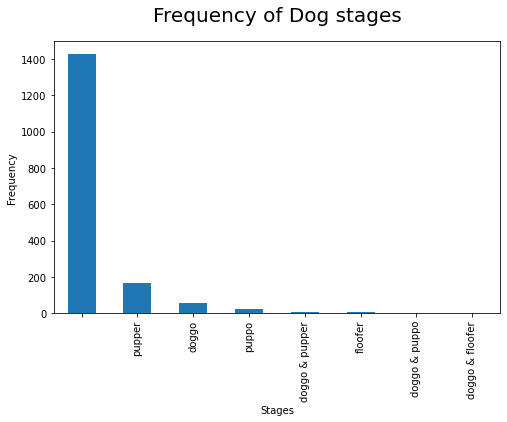

In [54]:
plt.xlabel("Stages")
plt.ylabel("Frequency")
plt.title("Frequency of Dog stages", {'fontsize': 20}, pad=20)
fds = all_dfs['stage'].value_counts()
fds.plot(kind='bar', figsize=(8,5))
all_dfs['stage'].value_counts()

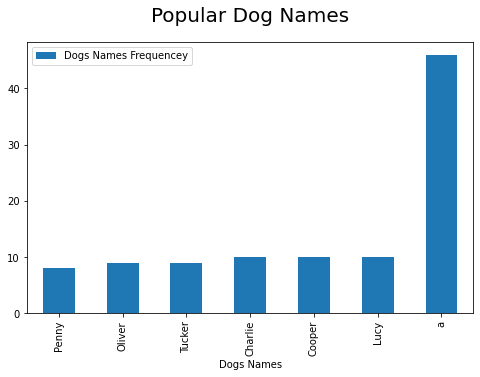

In [55]:
dog_names = all_dfs.query('name == name')
group_dog_names = dog_names.groupby('name').count()[['tweet_id']]
gdn = group_dog_names.query('tweet_id >= 8').sort_values(by=['tweet_id'])

gdn.plot(kind='bar', figsize=(8,5))
plt.title("Popular Dog Names",{'fontsize': 20},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequencey"])

In [56]:
def extract_breeds(row):
    breed_conf = 0
    breed_name = ''
    is_breed = 0
    if(row.p1_dog == 1):
        if(row.p1_conf >= breed_conf):
            breed_conf = row.p1_conf
            breed_name = row.p1
            is_breed = 1
    if(row.p2_dog == 1):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p2_conf
            breed_name = row.p2
            is_breed = 1
    if(row.p3_dog == 1):
        if(row.p2_conf >= breed_conf):
            breed_conf = row.p3_conf
            breed_name = row.p3
            is_breed = 1
    if is_breed == 0:
        return np.nan
    else:
        return breed_name
        
        
all_dfs['breed'] = all_dfs.apply(extract_breeds,axis=1)

In [57]:
all_dfs.breed.unique()

array(['Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'bloodhound', 'Bernese_mountain_dog',
       'West_Highland_white_terrier', 'cocker_spaniel',
       'flat-coated_retriever', 'Cardigan', 'Newfoundland', 'dalmatian',
       'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bouvier_des_Flandres', 'Bedlington_terrier',
       'Boston_bull', 'Old_English_sheepdog', 'black-and-tan

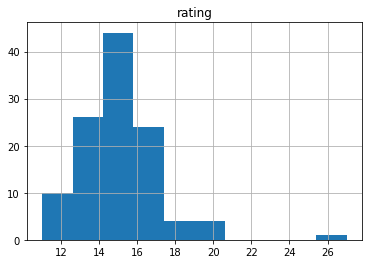

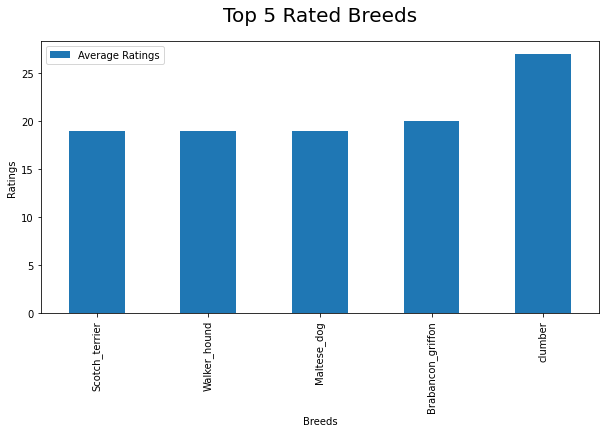

In [58]:
    
all_dfs['breed'] = all_dfs.apply(extract_breeds,axis=1)

breed_ratings = all_dfs.query('breed == breed')[['rating', 'breed']].groupby('breed').mean() * 10
breed_ratings.hist()

breed_ratings.sort_values(by=['rating']).tail(5).plot.bar(figsize=(10,5))
plt.title("Top 5 Rated Breeds",{'fontsize': 20},pad=20)
plt.xlabel('Breeds')
plt.ylabel('Ratings')
plt.legend(["Average Ratings"])

Text(0.5, 1.0, 'Retweet Counts by Ratings Scatter Plot')

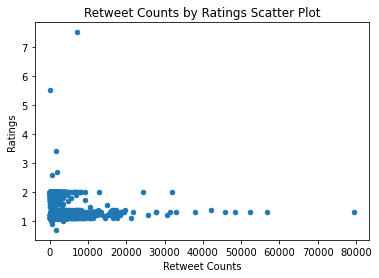

In [59]:
all_dfs.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')



#### Insights

1. Majority of the dogs belongs to no stage
2. 'a' happens to be the most popular dog name
3. dumber, Brabancon_griffon, Maltese_dog, Walker_hound and Scotch_terrier are the top rated breeds of dog with dumber topping the list
4. Dogs with the highest number of ratings do not have the highest number of retweet